# titanic project

In [1]:
import numpy as np 
import pandas as pd

In [2]:
data=pd.read_csv('./train.csv')

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


 #### around 200 values are missing in age and 600 values are missing in cabin

we dont need cabin so we will drop it

In [6]:
data.drop('Cabin',axis= 1 ,inplace=True)

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


```
the folowing information can be drawn from the above table:-
    the passenger id is just the number of passengers
    the value of survived is descreate numbers
    the passenger class has three values 1,2,3
    age varies between 0.42 to 80
    sibsp has min value 0 and max value 8  ```
                                          

In [9]:
data["Survived"].count()

891

In [10]:
data["Survived"].sum()

342

#### only 342 people survived out of 891

In [11]:
data.groupby('Sex')['Survived'].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

In [12]:
data.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

#### 233 femails survived out of 314
#### 109 males survived out 577

In [13]:
data.groupby('Embarked')['Survived'].count()

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64

In [14]:
data.groupby('Embarked')['Survived'].sum()

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64

#### most of people from S embarked have survived

In [15]:
data.groupby('Pclass')['Survived'].count()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [16]:
data.groupby('Pclass')['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [17]:
119/491

0.24236252545824846

#### survival in class 1= 62 %, survival in class 2=47%,survival in class 3=24%

In [18]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [19]:
data["is_child"]=data["Age"]<18

In [20]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False


In [21]:
data.groupby("is_child")["Survived"].sum()

is_child
False    281
True      61
Name: Survived, dtype: int64

In [22]:
data.groupby('is_child')["Survived"].count()

is_child
False    778
True     113
Name: Survived, dtype: int64

53% of children survived and 36% of the adults survived

In [23]:
plot_data=data.groupby(["Sex","is_child"])["Survived"].sum()

In [24]:
data.groupby(["Sex","is_child"])["Survived"].count()

Sex     is_child
female  False       259
        True         55
male    False       519
        True         58
Name: Survived, dtype: int64

In [25]:
plot_data.unstack()

is_child,False,True
Sex,,
female,195,38
male,86,23


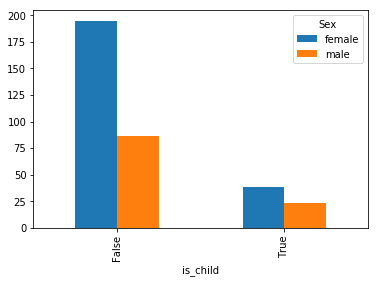

In [26]:
%matplotlib inline
plot_data.unstack(level=0).plot(kind="bar")

In [27]:
data["age_groups"]=pd.cut(data["Age"],bins=[0,10,20,30,40,50,60,70,80])

In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_child,age_groups
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,"(30, 40]"


In [29]:
data.groupby("age_groups")["Survived"].sum()

age_groups
(0, 10]     38
(10, 20]    44
(20, 30]    84
(30, 40]    69
(40, 50]    33
(50, 60]    17
(60, 70]     4
(70, 80]     1
Name: Survived, dtype: int64

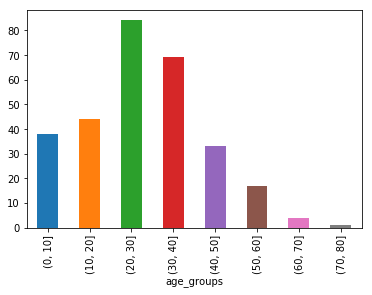

In [30]:
data.groupby("age_groups")["Survived"].sum().plot(kind="bar")

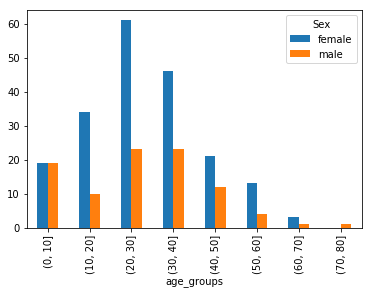

In [31]:
data.groupby(["age_groups","Sex"])["Survived"].sum().unstack().plot(kind="bar")

#### because most of the values are missing in age and it is one of the most imp factors we will predict age according to other factors

In [33]:
data.drop(["PassengerId","Ticket","Fare"],axis=1,inplace=True)

In [34]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,is_child,age_groups
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,False,"(20, 30]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,False,"(30, 40]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,False,"(20, 30]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,False,"(30, 40]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,False,"(30, 40]"


In [35]:
data.drop("age_groups", axis=1,inplace=True)

In [36]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,is_child
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,False
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,False
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,False
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,False


In [37]:
l_sir=[]
l_des=[]
for i in range(len(data)):
    string=data.loc[i,"Name"]
    l_sir.append(string.split(",")[0])
    l_des.append(string.split(",")[1].split(".")[0])
data["sirname"]=l_sir  
data["designation"]=l_des

In [38]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,is_child,sirname,designation
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,False,Braund,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,False,Cumings,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,False,Heikkinen,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,False,Futrelle,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,False,Allen,Mr
5,0,3,"Moran, Mr. James",male,NaN,0,0,Q,False,Moran,Mr
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,S,False,McCarthy,Mr
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,S,True,Palsson,Master
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,S,False,Johnson,Mrs
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,C,True,Nasser,Mrs


In [39]:
data.Age.replace('NaN',np.nan,inplace=True)
data.Embarked.replace('NaN',np.nan,inplace=True)

In [40]:
data.isnull().sum()

Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         2
is_child         0
sirname          0
designation      0
dtype: int64

In [42]:

part_1=data.dropna()
part_2=data.loc[~data.index.isin(data.dropna().index)]
part_2.isnull().sum()
len(part_2)

179

In [43]:
new_part_1=part_1[["Age","Survived","SibSp","Parch",]]
new_part_2=part_2[["Age","Survived","SibSp","Parch",]]

In [44]:
new_part_1=pd.get_dummies(new_part_1)
new_part_2=pd.get_dummies(new_part_2)
#part_1=new_data.dropna()
#part_2=new_data.loc[~new_data.index.isin(new_data.dropna().index)]
#part_2.isnull().sum()

In [45]:
x_train=new_part_1.iloc[:,1:]
y_train=new_part_1.iloc[:,0]
x_test=new_part_2.iloc[:,1:]
y_test=new_part_2.iloc[:,0]

In [46]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)      

(712, 3)
(712,)
(179, 3)
(179,)


In [47]:
y_train

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
18     31.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
27     19.0
30     40.0
33     66.0
34     28.0
35     42.0
37     21.0
38     18.0
       ... 
856    45.0
857    51.0
858    24.0
860    41.0
861    21.0
862    48.0
864    24.0
865    42.0
866    27.0
867    31.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 712, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
#x_t,x1,y_t,y1=train_test_split(x_train,y_train,test_size=0.3,random_state=24)
#print(x_t.shape)
#print(y_t.shape)
#print(x1.shape)
#print(y1.shape)
lr.fit(x_train,y_train)

predictions=lr.predict(x_test)
#lr.score(x_test,y_test)

In [53]:
part_2["Age"]=predictions

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
part_2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,is_child,sirname,designation
5,0,3,"Moran, Mr. James",male,33.376161,0,0,Q,False,Moran,Mr
17,1,2,"Williams, Mr. Charles Eugene",male,31.018977,0,0,S,False,Williams,Mr
19,1,3,"Masselmani, Mrs. Fatima",female,31.018977,0,0,C,False,Masselmani,Mrs
26,0,3,"Emir, Mr. Farred Chehab",male,33.376161,0,0,C,False,Emir,Mr
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,31.018977,0,0,Q,False,O'Dwyer,Miss
29,0,3,"Todoroff, Mr. Lalio",male,33.376161,0,0,S,False,Todoroff,Mr
31,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,26.647337,1,0,C,False,Spencer,Mrs
32,1,3,"Glynn, Miss. Mary Agatha",female,31.018977,0,0,Q,False,Glynn,Miss
36,1,3,"Mamee, Mr. Hanna",male,31.018977,0,0,C,False,Mamee,Mr
42,0,3,"Kraeff, Mr. Theodor",male,33.376161,0,0,C,False,Kraeff,Mr


In [55]:
part_1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,is_child,sirname,designation
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,False,Braund,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,False,Cumings,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,False,Heikkinen,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,False,Futrelle,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,False,Allen,Mr
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,S,False,McCarthy,Mr
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,S,True,Palsson,Master
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,S,False,Johnson,Mrs
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,C,True,Nasser,Mrs
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,S,True,Sandstrom,Miss


In [61]:
part_1.drop(["Name","designation","sirname","is_child"],axis=1,inplace=True)
part_2.drop(["Name","designation","sirname","is_child"],axis=1,inplace=True)

C:\anaconda\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [63]:

part_2.head()
#part_2.drop(["PassengerId","Name","Ticket","Fare","is_child","sirname","designation"],axis=1,inplace=True)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
5,0,3,male,33.376161,0,0,Q
17,1,2,male,31.018977,0,0,S
19,1,3,female,31.018977,0,0,C
26,0,3,male,33.376161,0,0,C
28,1,3,female,31.018977,0,0,Q


In [65]:
#part_1.drop(["is_child"],axis=1,inplace=True)
part_1.head()

C:\anaconda\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [66]:
new_part=pd.concat([part_1,part_2])
new_part

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.000000,1,0,S
1,1,1,female,38.000000,1,0,C
2,1,3,female,26.000000,0,0,S
3,1,1,female,35.000000,1,0,S
4,0,3,male,35.000000,0,0,S
6,0,1,male,54.000000,0,0,S
7,0,3,male,2.000000,3,1,S
8,1,3,female,27.000000,0,2,S
9,1,2,female,14.000000,1,0,C
10,1,3,female,4.000000,1,1,S


In [68]:
new_part=pd.get_dummies(new_part)
new_part.head()
#new_part.drop(["Fare"],axis=1,inplace=True)

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
x1_train=new_part.drop(["Survived"],axis=1)
y1_train=new_part.loc[:,"Survived"]
x2_train,x2_test,y2_train,y2_test=train_test_split(x1_train,y1_train,test_size=0.3,random_state=42)
print(x2_train.shape)
print(y2_train.shape)
dt.fit(x2_train,y2_train)
#predictions=dt.predict(test_data)
dt.score(x2_test,y2_test)

(623, 9)
(623,)


0.8246268656716418

In [70]:
print(predictions)

[33.37616142 31.01897655 31.01897655 33.37616142 31.01897655 33.37616142
 26.64733687 31.01897655 31.01897655 33.37616142 33.37616142 29.00452175
 31.01897655 24.63288207 31.01897655 31.01897655 33.37616142 25.41432529
 33.37616142 33.37616142 31.01897655 33.37616142 33.37616142 33.37616142
 31.01897655 26.64733687 33.37616142 33.37616142 25.41432529 30.91013825
 33.37616142 33.37616142 -4.06297915 29.78596496 33.37616142 19.02823081
 -4.06297915 33.37616142 33.37616142 26.64733687 33.37616142 31.01897655
 -4.06297915 29.00452175 33.37616142 19.02823081 33.37616142 29.00452175
 26.64733687 33.37616142 31.01897655 33.37616142 33.37616142 33.37616142
 31.01897655 33.37616142 33.37616142 33.37616142 31.01897655 31.01897655
 22.2756972  31.01897655 33.37616142 31.01897655 -4.06297915 22.2756972
 26.64733687 33.37616142 26.64733687 33.37616142 33.37616142 31.01897655
 31.01897655 29.00452175 31.01897655 31.01897655 26.64733687 33.37616142
 33.37616142 19.02823081 33.37616142 33.37616142 33.

In [71]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x2_train,y2_train)
clf.score(x2_test,y2_test)

0.8171641791044776

# to be continued in part two